In [1]:
import kagglehub
path = kagglehub.dataset_download("aungpyaeap/supermarket-sales")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\divya\.cache\kagglehub\datasets\aungpyaeap\supermarket-sales\versions\3


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.drop(columns = 'Invoice ID',inplace = True)

In [9]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

In [10]:
df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y')

In [11]:
df['Datetime'] = pd.to_datetime(df['Date'].astype('str')+' '+df['Time'].astype('str'))

In [12]:
# plt.figure(figsize = (7,5))
# sns.heatmap(df[['Unit price','Quantity','Tax 5%','Total','cogs','gross margin percentage','gross income','Rating']].corr(),annot = True,cmap="coolwarm")

In [13]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08 10:37:00


In [14]:
print(df[['Datetime']].head())

             Datetime
0 2019-01-05 13:08:00
1 2019-03-08 10:29:00
2 2019-03-03 13:23:00
3 2019-01-27 20:33:00
4 2019-02-08 10:37:00


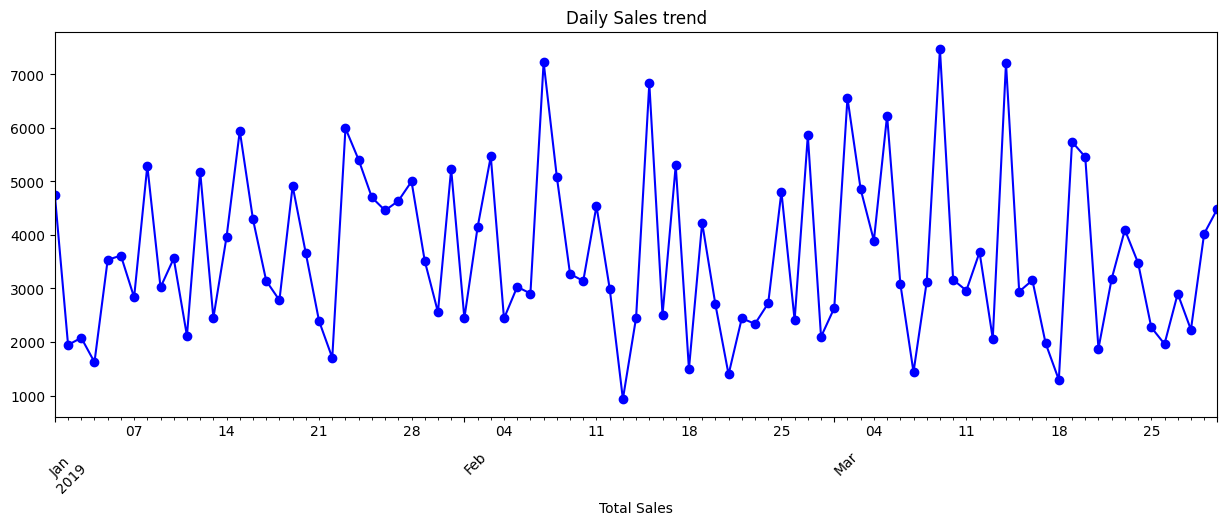

In [49]:
df.groupby('Date')['Total'].sum().plot(kind = 'line',marker = 'o',color = 'b',figsize = (15,5))
plt.xlabel('Date')
plt.xlabel('Total Sales')
plt.xticks(rotation = 45)
plt.title('Daily Sales trend')
plt.show()

In [16]:
df['Day_of_week'] = df['Date'].dt.day_name()

In [17]:
sales_by_day = df.groupby("Day_of_week")["Total"].sum()
print(sales_by_day)

Day_of_week
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64


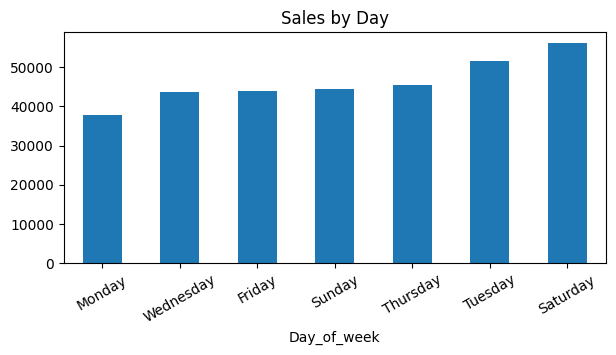

In [47]:
sales_by_day.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Sales by Day')
plt.show()

In [19]:
tuesday_sales = df[df['Day_of_week'] == 'Tuesday']

In [20]:
top_products_tuesday = tuesday_sales.groupby('Product line')['Total'].sum()

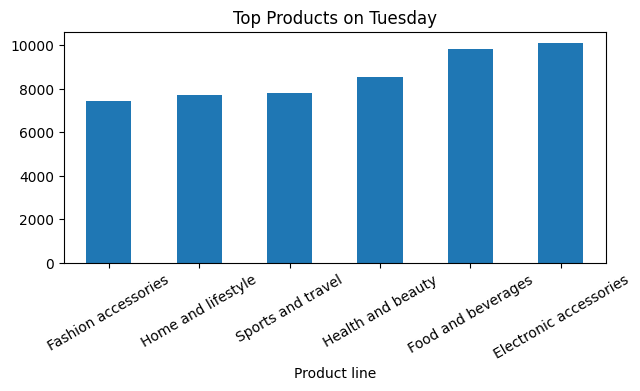

In [21]:
top_products_tuesday.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Top Products on Tuesday')
plt.show()

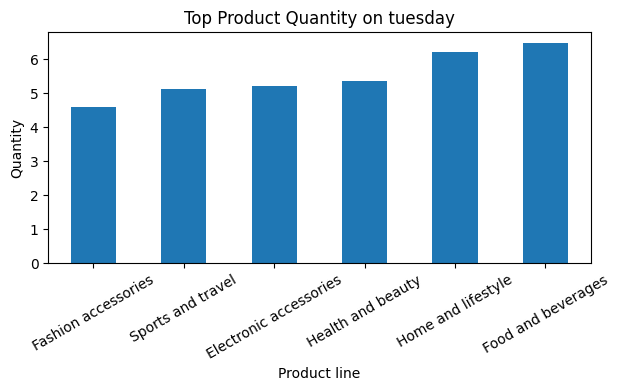

In [22]:
quantity_by_day = tuesday_sales.groupby('Product line')['Quantity'].mean()
quantity_by_day.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.ylabel('Quantity')
plt.xticks(rotation = 30)
plt.title('Top Product Quantity on tuesday')
plt.show()

In [23]:
saturday_sales = df[df['Day_of_week'] == 'Saturday']

In [24]:
saturday_product_sales = saturday_sales.groupby('Product line')['Total'].sum()
saturday_product_sales

Product line
Electronic accessories     9744.3780
Fashion accessories       10778.9220
Food and beverages         9375.3975
Health and beauty          7410.3435
Home and lifestyle         9208.0065
Sports and travel          9603.7620
Name: Total, dtype: float64

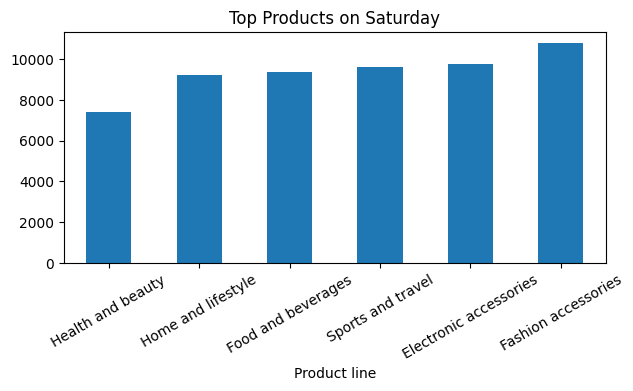

In [25]:
saturday_product_sales.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Top Products on Saturday')
plt.show()

In [26]:
saturday_quantity = saturday_sales.groupby('Product line')['Quantity'].sum()
saturday_quantity

Product line
Electronic accessories    159
Fashion accessories       179
Food and beverages        151
Health and beauty         107
Home and lifestyle        149
Sports and travel         174
Name: Quantity, dtype: int64

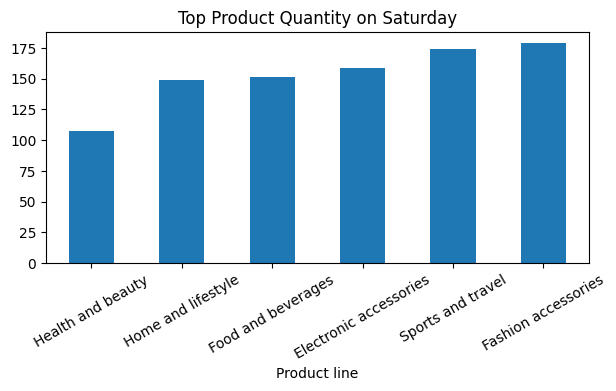

In [50]:
saturday_quantity.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Top Product Quantity on Saturday')
plt.show()

In [28]:

sunday_sales = df[df['Day_of_week'] == 'Sunday']

In [29]:
sunday_product_sales = df.groupby('Product line')['Total'].sum()
sunday_product_sales

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

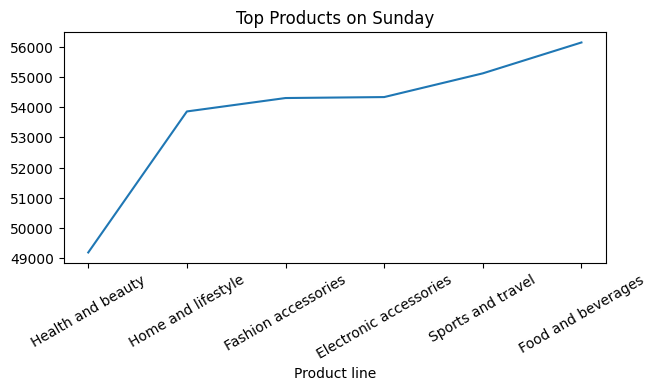

In [52]:
sunday_product_sales.sort_values().plot(kind = 'line',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Top Products on Sunday')
plt.show()

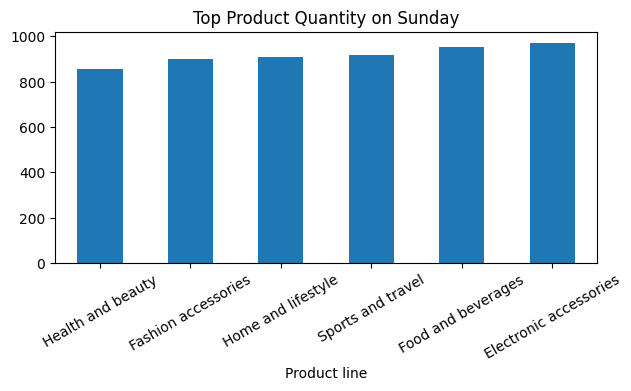

In [54]:
sunday_quantity = df.groupby('Product line')['Quantity'].sum()
sunday_quantity.sort_values().plot(kind = 'bar',figsize = (7,3))
plt.xticks(rotation = 30)
plt.title('Top Product Quantity on Sunday')
plt.show()

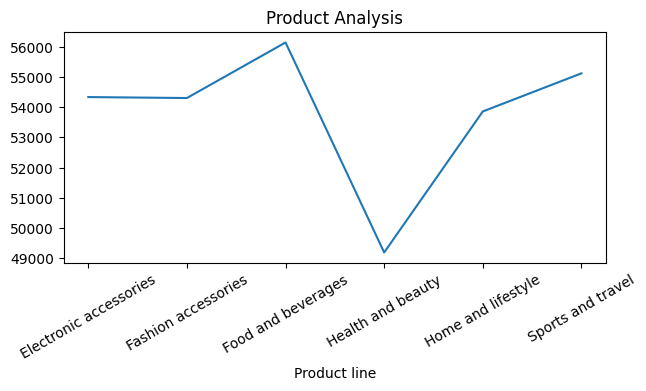

In [56]:
plt.figure(figsize = (7,3))
df.groupby('Product line')['Total'].sum().plot(kind = 'line')
plt.xticks(rotation = 30)
plt.title('Product Analysis')
plt.show()

In [33]:
df['Month'] = df['Date'].dt.strftime('%B')

In [34]:
df[['Month']].head(5)

,Month
0,January
1,March
2,March
3,January
4,February


In [35]:
df.head(1)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Datetime,Day_of_week,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,Saturday,January


In [59]:
january_product_sales = df.groupby(['Month','Product line'])['Total'].sum().unstack()
january_product_sales

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
February,17362.9050,19009.8615,20000.358,14602.2555,12434.3835,13809.6105
January,18831.2880,19345.1160,19570.530,16383.1710,20494.7400,21667.0230
March,18143.3385,15950.9175,16573.956,18208.3125,20932.7895,19646.1930


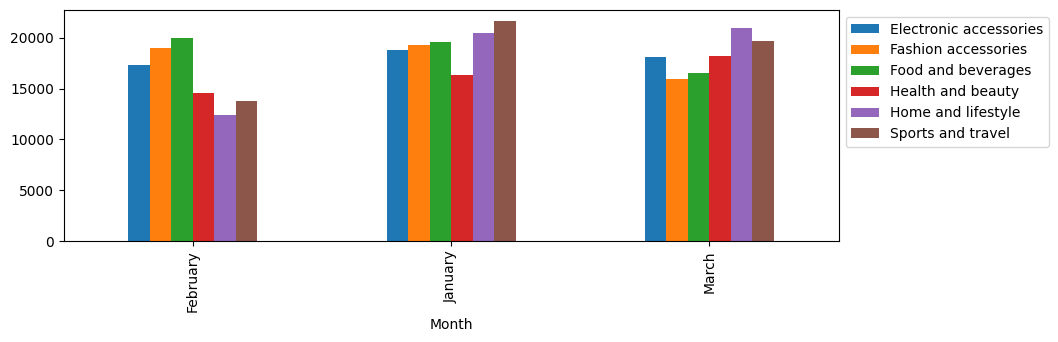

In [60]:
ax = january_product_sales.plot(kind = 'bar',figsize = (10,3))
ax.legend(loc = 'upper left', bbox_to_anchor = (1,1))

In [61]:
january_sales = df[df['Month']=='January']

In [62]:
january_product_sales1 = january_sales.groupby(['Date','Product line'])['Total'].sum()
january_product_sales1

Date        Product line          
2019-01-01  Electronic accessories    1382.7450
            Fashion accessories        621.2430
            Food and beverages        1066.0230
            Health and beauty          132.0270
            Home and lifestyle         399.7560
                                        ...    
2019-01-30  Home and lifestyle          79.3905
            Sports and travel          183.9390
2019-01-31  Electronic accessories    2366.5950
            Fashion accessories       2058.2940
            Sports and travel          807.6075
Name: Total, Length: 153, dtype: float64

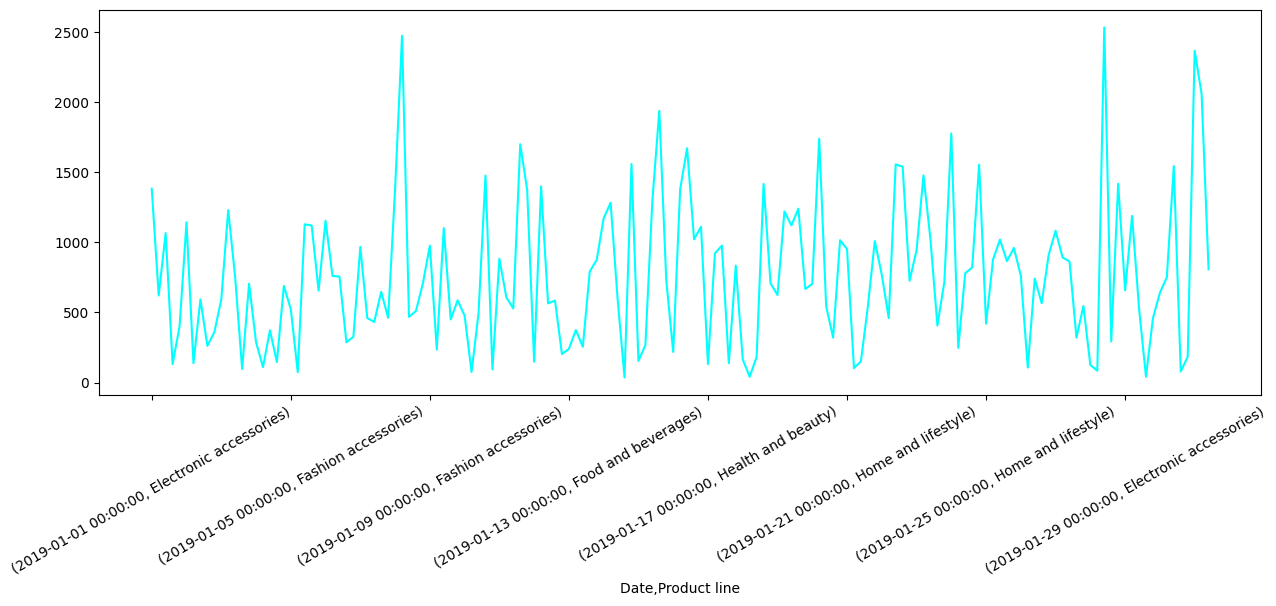

In [63]:
plt.figure(figsize = (15,5))
january_product_sales1.plot(kind = 'line',color = 'cyan')
plt.xticks(rotation = 30)
plt.show()

In [41]:
january_quantity_sales = january_sales.groupby('Product line')['Quantity'].sum()
january_quantity_sales

Product line
Electronic accessories    333
Fashion accessories       336
Food and beverages        325
Health and beauty         254
Home and lifestyle        342
Sports and travel         375
Name: Quantity, dtype: int64

In [42]:
january_electronic_sales = df[df['Product line'] == 'Electronic accessories']

<Axes: xlabel='Date'>

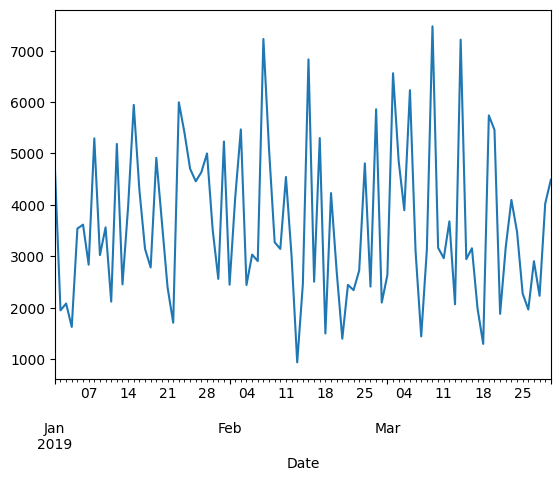

In [43]:
january_electronic_sales = df.groupby('Date')['Total'].sum()
january_electronic_sales.plot(kind = 'line')

C:\Users\divya\AppData\Local\Temp\ipykernel_15340\1899639389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'].value_counts().index, y=df['Month'].value_counts().values, palette="coolwarm")


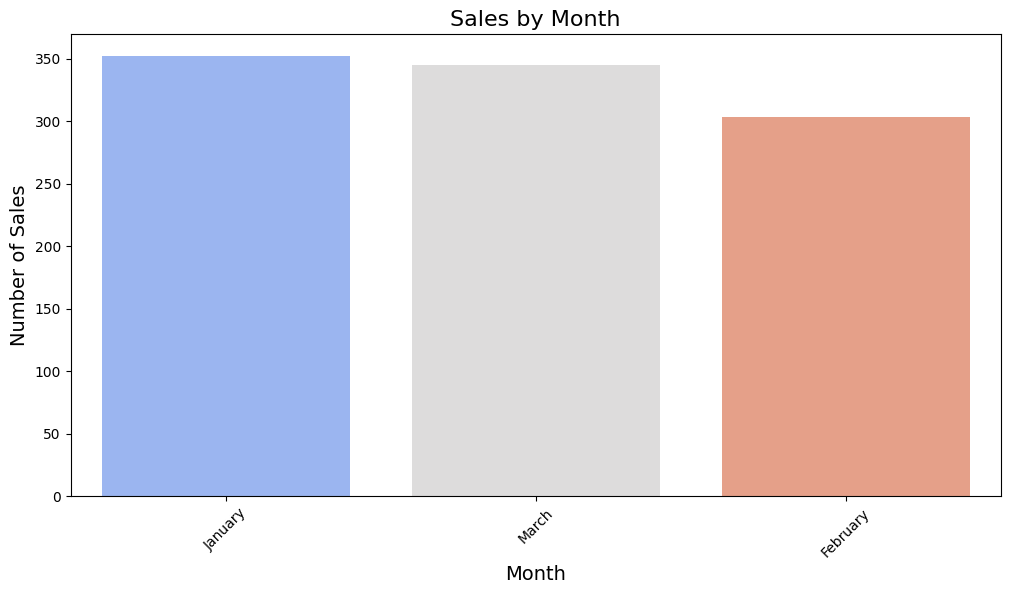

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Month'].value_counts().index, y=df['Month'].value_counts().values, palette="coolwarm")
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.title("Sales by Month", fontsize=16)
plt.xticks(rotation=45)
plt.show()

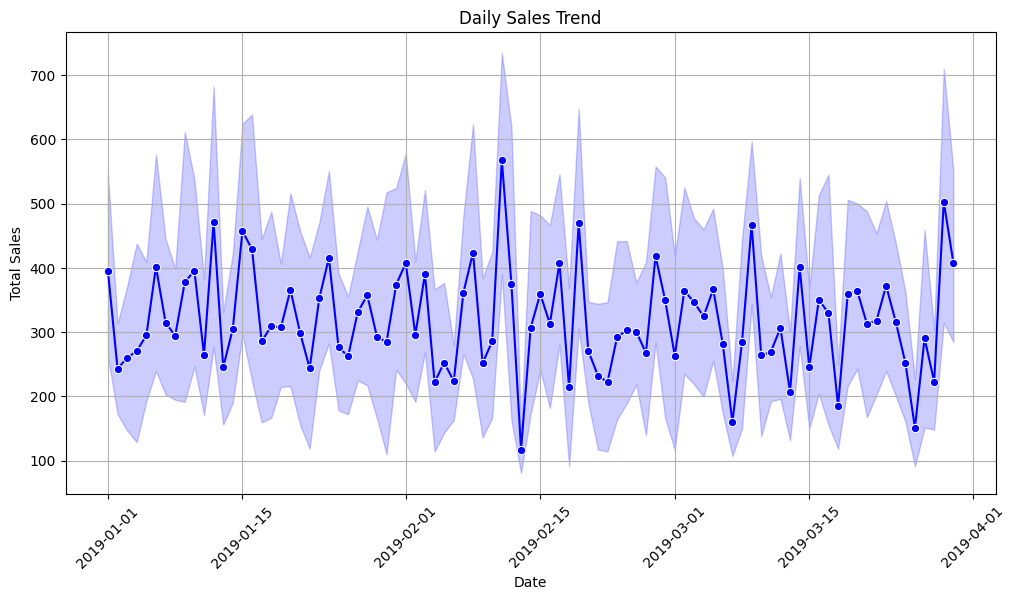

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Date'], y=df['Total'], marker='o', color='b')
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()